# Demographics EDA

This notebook focuses in the exploratory data analysis of the patient's demographic features.

## Import Libraries

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

**Set Seaborn Styles** 

In [2]:
#Set Seaborn style

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("notebook", font_scale=1.2)

## Upload Random Sampled Data

Upload patient demographic columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')


# Patient demographic columns 

pat_charc = ['ANO_CMPT','MES_CMPT','MUNIC_RES',
             'SEXO','IDADE','MORTE','NACIONAL','NUM_FILHOS',
             'INSTRU','GESTRISCO','CBOR','RACA_COR','ETNIA']


pat_charc_data = pd.read_csv(AIH_sample_path, 
                             encoding = 'UTF-8', 
                             na_values= ['NaN',' ',''],
                             usecols = pat_charc)

CPU times: user 34.9 s, sys: 2.89 s, total: 37.8 s
Wall time: 38 s


In [4]:
pat_charc_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329642 entries, 0 to 8329641
Data columns (total 13 columns):
ANO_CMPT      8329642 non-null int64
MES_CMPT      8329642 non-null int64
MUNIC_RES     8329642 non-null int64
SEXO          8329642 non-null int64
IDADE         8329642 non-null int64
MORTE         8329642 non-null int64
NACIONAL      8329642 non-null int64
NUM_FILHOS    8329642 non-null int64
INSTRU        8329642 non-null int64
GESTRISCO     8329642 non-null int64
CBOR          8329642 non-null int64
RACA_COR      8329642 non-null int64
ETNIA         8329642 non-null int64
dtypes: int64(13)
memory usage: 826.2 MB


## Demographics Data Bloc Initial Exploration and Wrangling

In [5]:
# See dataframe's first 10 rows

pat_charc_data.head(10)

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
0,2015,8,355030,3,33,0,10,0,0,1,0,3,0
1,2015,8,530010,1,0,0,10,0,0,1,0,99,0
2,2015,10,160030,3,30,0,10,0,0,1,0,3,0
3,2015,3,150080,1,12,0,10,0,0,1,0,3,0
4,2015,12,315750,1,34,0,10,0,0,1,0,3,0
5,2015,8,313630,3,17,0,10,0,0,1,0,99,0
6,2015,7,520110,1,43,0,10,0,0,1,0,3,0
7,2015,12,230250,1,79,0,10,0,0,1,0,1,0
8,2015,11,355370,3,65,0,10,0,0,1,0,1,0
9,2015,1,351510,3,26,0,10,0,0,1,0,3,0


In [6]:
pat_charc_data.describe()

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
count,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06
mean,2.016046e+03,6.110789e+00,3.277015e+05,2.171629e+00,3.968477e+01,4.134487e-02,1.015701e+01,2.223409e-02,1.994107e-02,9.990338e-01,3.052517e+01,2.772210e+01,2.537580e-01
std,1.220008e+00,3.349829e+00,9.430158e+04,9.851618e-01,2.412030e+01,1.990866e-01,3.466309e+00,2.745826e-01,2.288340e-01,3.106855e-02,3.333605e+03,4.276135e+01,6.505445e+00
min,2.015000e+03,1.000000e+00,1.100010e+05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.015000e+03,3.000000e+00,2.614500e+05,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.015000e+03,6.000000e+00,3.303900e+05,3.000000e+00,3.600000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
75%,2.017000e+03,9.000000e+00,4.101000e+05,3.000000e+00,5.900000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.900000e+01,0.000000e+00
max,2.018000e+03,1.200000e+01,5.301800e+05,3.000000e+00,9.900000e+01,1.000000e+00,3.500000e+02,6.300000e+01,4.000000e+00,1.000000e+00,8.485100e+05,9.900000e+01,2.640000e+02


**Demographics Bloc Descriptive Findings:** 

+ **MUNIC_RES:** Municipality is coded in k's.
+ **NASC:** This is date of birth. 
+ **SEX:** Coded 1 to 3. 
+ **AGE:** Is a number. Min is 0, Max is 99. 99's are likely missing values representation. 
+ **MORTE:** Indicator of death, 0 or 1. 
+ **NACIONAL:** Nationality, coded 1 to 350.
+ **NUM_FILHOS:** Number of children of the patient.  This is a number. Min 0, Max 63 (this is unlikely to be right). 75th pct is 0. 
+ **INSTRU:** Degree of instruction of the patient (i.e. education level). Min 0, Max 4.
+ **GESTRISCO:** Pregnant at risk indicator. Min 0, Max 1
+ **CBOR:** Occupation of the patient. Min 0, Max 848,510.
+ **RACA_COR:** Race of the patient. Min 0, Max 99. 99's are missing values representation.
+ **ETNIA:** Ethnicity of the patient. Used if race is indigenous. Min 0, Max 264.

> **Create Plots of Categorical Variables**

In [7]:
# Create counts by categories

count_muni = pd.DataFrame(pat_charc_data.MUNIC_RES.value_counts()).reset_index()
count_sexo = pd.DataFrame(pat_charc_data.SEXO.value_counts()).reset_index()
count_morte = pd.DataFrame(pat_charc_data.MORTE.value_counts()).reset_index()
count_instru = pd.DataFrame(pat_charc_data.INSTRU.value_counts()).reset_index()
count_naci = pd.DataFrame(pat_charc_data.NACIONAL.value_counts()).reset_index()
count_gest = pd.DataFrame(pat_charc_data.GESTRISCO.value_counts()).reset_index()
count_cbor = pd.DataFrame(pat_charc_data.CBOR.value_counts()).reset_index()
count_raca = pd.DataFrame(pat_charc_data.RACA_COR.value_counts()).reset_index()
count_etnia = pd.DataFrame(pat_charc_data.ETNIA.value_counts()).reset_index()

> **Var:** `Sex of the Patient`

Text(0.5,1,'Sex of the Patient')

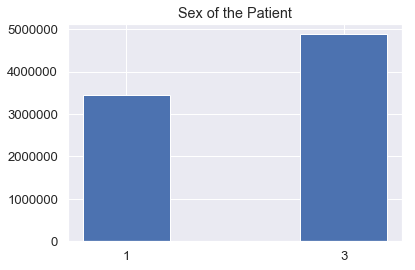

In [8]:
# Sex of the patient 

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_sexo['index'], height = count_sexo.SEXO, tick_label = count_sexo['index'])

plt.title('Sex of the Patient')

Add gender category names to dataframe.

In [9]:
# Create dictionary with categories

sex = {1: 'male', 3: 'female'}

# Map dictionary to a new column

pat_charc_data['sexo_names'] = [sex[item] for item in pat_charc_data.SEXO]

> **Var:** `Death Indicator`

Text(0.5,1,'Death Indicator')

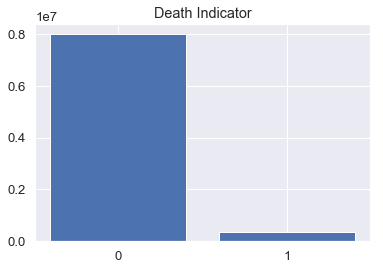

In [10]:
# Death indicator

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_morte['index'], height = count_morte.MORTE, tick_label = count_morte['index'])

plt.title('Death Indicator')

> **Var:** `Instruction Level`

Text(0.5,1,'Instruction Level of the Patient')

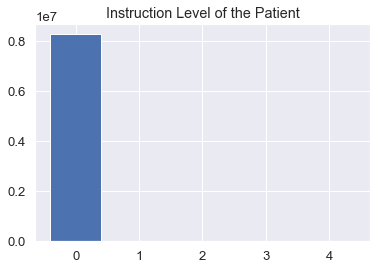

In [11]:
# Instruction Level of the patient (i.e. education level)

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_instru['index'], height = count_instru.INSTRU, tick_label = count_instru['index'])

plt.title('Instruction Level of the Patient')

This variable is be populated mostly by 0's. Which means is mostly empty.

> **Var:** `Pregnancy at Risk`

   index  GESTRISCO
0      1    8321594
1      0       8048


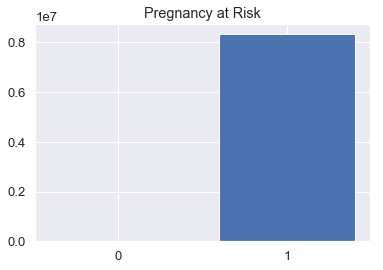

In [12]:
# Pregnancy at risk

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_gest['index'], height = count_gest.GESTRISCO, tick_label = count_gest['index'])

plt.title('Pregnancy at Risk')

print(count_gest)

This variable has serious data entry issues. It is not possible to be male and pregnant at risk.

> **Var:** `Municipality of the Patient`

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text xticklabel objects>)

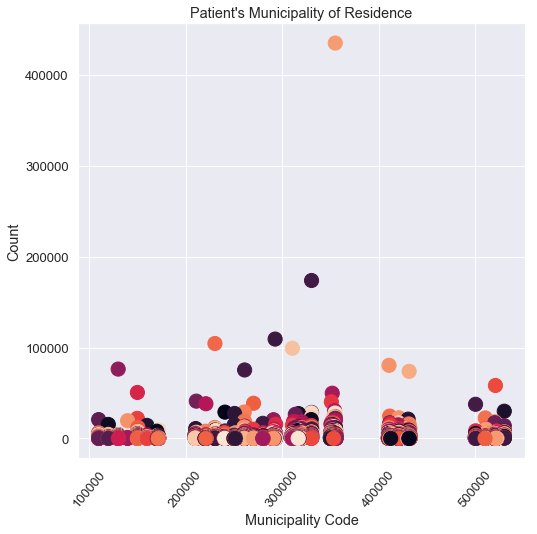

In [13]:
# Plot municipalities of patients

colors = np.random.rand(len(count_muni))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_muni['index'], y = count_muni['MUNIC_RES'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel('Municipality Code')

plt.title("Patient's Municipality of Residence")

plt.xticks(rotation = 50)

* Add municipality names to the dataframe

In [21]:
%%time

muni_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/Municipalities.csv')

muni_data = pd.read_csv(muni_path, sep = '\t')

CPU times: user 7.78 ms, sys: 2.26 ms, total: 10 ms
Wall time: 8.49 ms


In [22]:
#See head of municipality codes

muni_data.head()

,MUNIC_RES,MUNIC_RES_NAME
0,110001,Alta Floresta D'Oeste
1,110037,Alto Alegre dos Parecis
2,110040,Alto Paraíso
3,110034,Alvorada D'Oeste
4,110002,Ariquemes


In [26]:
pat_charc_data = pat_charc_data.merge(muni_data, how = 'left', on = 'MUNIC_RES')

pat_charc_data.head(15)

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA,sexo_names,MUNIC_RES_NAME
0,2015,8,355030,3,33,0,10,0,0,1,0,3,0,female,São Paulo
1,2015,8,530010,1,0,0,10,0,0,1,0,99,0,male,Brasília
2,2015,10,160030,3,30,0,10,0,0,1,0,3,0,female,Macapá
3,2015,3,150080,1,12,0,10,0,0,1,0,3,0,male,Ananindeua
4,2015,12,315750,1,34,0,10,0,0,1,0,3,0,male,Santa Efigênia de Minas
5,2015,8,313630,3,17,0,10,0,0,1,0,99,0,female,João Pinheiro
6,2015,7,520110,1,43,0,10,0,0,1,0,3,0,male,Anápolis
7,2015,12,230250,1,79,0,10,0,0,1,0,1,0,male,Brejo Santo
8,2015,11,355370,3,65,0,10,0,0,1,0,1,0,female,Taquaritinga
9,2015,1,351510,3,26,0,10,0,0,1,0,3,0,female,Embu-Guaçu


> **Var:** `Patient's Nationality`

   index  NACIONAL
0     10   8298661
1     55     11130
2     22      2628
3     23      2183
4     45      1468


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

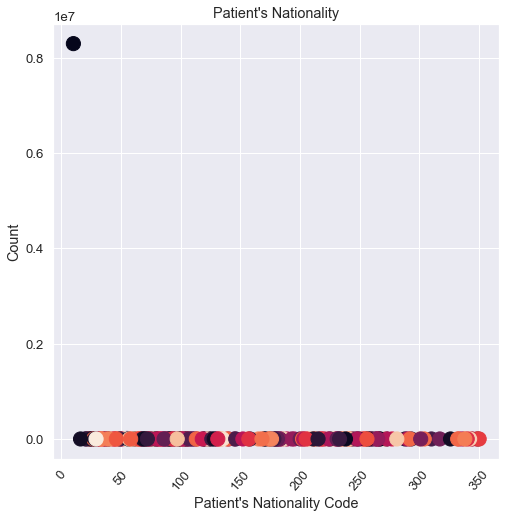

In [27]:
print(count_naci.head(5))

# Plot Top 20 nationalities of patients

colors = np.random.rand(len(count_naci))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_naci['index'], y = count_naci['NACIONAL'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Nationality Code")

plt.title("Patient's Nationality")

plt.xticks(rotation = 50)

The overwhemling majority of nationality is 10. Which is Brazilian. This makes sense. However, this information is likely not useful information to give to the model since it will not learn much from this information.

> **Var:** `Patient's Occupation`

    index     CBOR
0       0  8328783
1  225125      436
2  515105      131
3  225265       67
4  225133       49


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text xticklabel objects>)

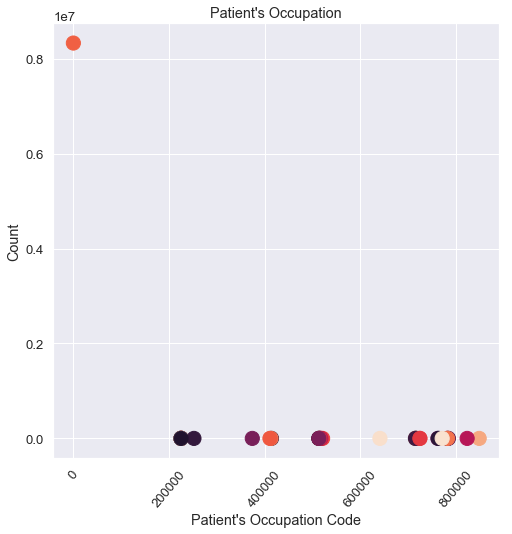

In [28]:
print(count_cbor.head(5))

# Plot occupations of patients

colors = np.random.rand(len(count_cbor))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_cbor['index'], y = count_cbor['CBOR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Occupation Code")

plt.title("Patient's Occupation")

plt.xticks(rotation = 50)

This is for the most populated by zeros (0). This means that is mostly empty.

> **Var:** `Patient's Race`

   index  RACA_COR
0      3   2947820
1      1   2751700
2     99   2203827
3      2    290747
4      4    118092
5      5     17456


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

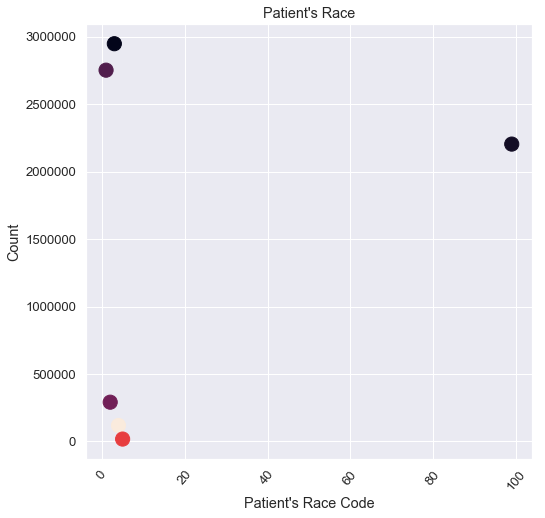

In [29]:
print(count_raca)

# Plot Race of patients

colors = np.random.rand(len(count_raca))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_raca['index'], y = count_raca['RACA_COR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Race")

plt.xticks(rotation = 50)

There are 2,203,827 marked as 99 or unknown. This is 26% of the available data.

Add race category names to dataframe.

In [31]:
# Create dictionary with categories

race = {1: 'brown', 2: 'black', 3: 'white', 4:'asian', 5:'indigenous', 99: np.nan}

# Map dictionary to a new column

pat_charc_data['race_names'] = [race[item] for item in pat_charc_data.RACA_COR]

In [32]:
#Replace 99's with np.nan

pat_charc_data['RACA_COR'] = pat_charc_data['RACA_COR'].replace(to_replace = 99, value = np.nan)

> **Var:** `Patient's Ethnicity`

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

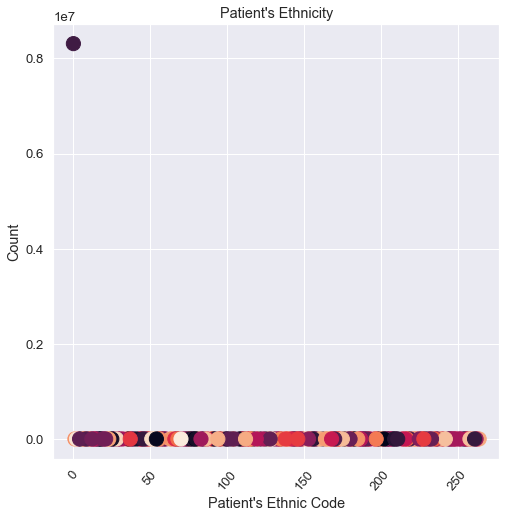

In [33]:
# Plot ethnicities of patients

colors = np.random.rand(len(count_etnia))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_etnia['index'], y = count_etnia['ETNIA'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Ethnic Code")

plt.title("Patient's Ethnicity")

plt.xticks(rotation = 50)

There are many 0's. However, this makes sense because this field is only used if the patient is of an specific race category.

In [34]:
# Replace 0's with np.nan's

pat_charc_data['ETNIA'] = pat_charc_data['ETNIA'].replace(to_replace = 0, value = np.nan)

> **Create plots of Continous Variables**

>> **Vars:** `Patient's Age & Patient's Number of Children`

*Number of Children Greater > 15 & 30 (these are very suspect)*

In [35]:
# Filter by number of children (greater than 15 children). These are suspect entries.

print('Rows with number of children > 15: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 15]))

print('Rows with number of children > 30: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 30]))

print('Rows with number of children = 0: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] == 0]))

Rows with number of children > 15:  26
Rows with number of children > 30:  14
Rows with number of children = 0:  8263019


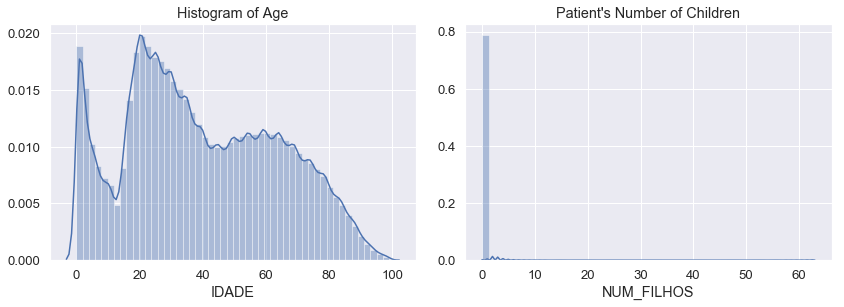

In [36]:
# Plot age variable

plt.subplot(221)

sns.distplot(pat_charc_data.IDADE)

plt.title('Histogram of Age')

# Plot patient's number of children variable

plt.subplot(222)

sns.distplot(pat_charc_data['NUM_FILHOS'].dropna())

plt.title("Patient's Number of Children")

plt.tight_layout(rect=(2, 2, 4, 4))

+ Age has a three peaks.

+ Patients number pf children is mostly 0's.

#### Demographic Features Selection

Based on the findings of the initial exploratory data analysis I will use the following demographic features due to the fact that they are fairly complete and there is no reasons to suspect data entry errors. 
    
+ **Municipality of Residence**

+ **Gender**

+ **Age**

+ **Race**

+ **Ethnicity**

+ **Death Indicator**

I will drop the following columns due to either large amounts of missing values or suspicion of serious data entry errors.
    
+ **Pregnancy ar risk**

+ **Instruction Level**

+ **Occupation**

+ **Patient's Number of Children**

+ **Nationality**

> **Recode categorical variables.**

In [54]:
#Convert to categorical variables. This is to make it easier to visualize and wrangle. 
#These variables are coded based on administrative nomemclatures, I will change this to numbers.

# Municipal Variable

pat_charc_data["MUNIC_RES_NAME"] = pat_charc_data["MUNIC_RES_NAME"].astype('category')

# Race Variables

pat_charc_data["race_names"] = pat_charc_data['race_names'].astype('category')

# Ethnicity Variables

pat_charc_data["ETNIA"] = pat_charc_data["ETNIA"].astype('category')

# Sex Variables

pat_charc_data["sexo_names"] = pat_charc_data["sexo_names"].astype('category')

In [55]:
# Create new columns with codes

pat_charc_data["MUNIC_RES_CAT"] = pat_charc_data["MUNIC_RES_NAME"].cat.codes

pat_charc_data["RACA_COR_CAT"] = pat_charc_data["race_names"].cat.codes

pat_charc_data["ETNIA_CAT"] = pat_charc_data["ETNIA"].cat.codes

pat_charc_data["SEXO_CAT"] = pat_charc_data["sexo_names"].cat.codes

## Create Cleaned Demographic DataFrame

In [56]:
pat_charc_data_clean = pat_charc_data[['ANO_CMPT','MES_CMPT','MUNIC_RES_CAT', 'MUNIC_RES_NAME',
                                       'SEXO_CAT',"sexo_names",'RACA_COR_CAT',"race_names",
                                       'ETNIA_CAT','IDADE','MORTE']]

In [57]:
pat_charc_data_clean.head()

,ANO_CMPT,MES_CMPT,MUNIC_RES_CAT,MUNIC_RES_NAME,SEXO_CAT,sexo_names,RACA_COR_CAT,race_names,ETNIA_CAT,IDADE,MORTE
0,2015,8,4756,São Paulo,0,female,4,white,-1,33,0
1,2015,8,676,Brasília,1,male,-1,NaN,-1,0,0
2,2015,10,2676,Macapá,0,female,4,white,-1,30,0
3,2015,3,176,Ananindeua,1,male,4,white,-1,12,0
4,2015,12,4159,Santa Efigênia de Minas,1,male,4,white,-1,34,0


In [58]:
# The cat codes accesor codes missing as -1. Replace - 1 with np.nan's

pat_charc_data_clean_1 = pat_charc_data_clean.replace(to_replace = -1, value = np.nan)

In [59]:
pat_charc_data_clean_1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8329642 entries, 0 to 8329641
Data columns (total 11 columns):
ANO_CMPT          8329642 non-null int64
MES_CMPT          8329642 non-null int64
MUNIC_RES_CAT     8256827 non-null float64
MUNIC_RES_NAME    8256827 non-null category
SEXO_CAT          8329642 non-null int8
sexo_names        8329642 non-null category
RACA_COR_CAT      6125815 non-null float64
race_names        6125815 non-null category
ETNIA_CAT         17322 non-null float64
IDADE             8329642 non-null int64
MORTE             8329642 non-null int64
dtypes: category(3), float64(3), int64(4), int8(1)
memory usage: 548.3 MB


* Race and ethnia has missing values. Other columns are complete.

In [60]:
pat_charc_data_clean_1.describe()

,ANO_CMPT,MES_CMPT,MUNIC_RES_CAT,SEXO_CAT,RACA_COR_CAT,ETNIA_CAT,IDADE,MORTE
count,8.329642e+06,8.329642e+06,8.256827e+06,8.329642e+06,6.125815e+06,17322.000000,8.329642e+06,8.329642e+06
mean,2.016046e+03,6.110789e+00,2.763170e+03,4.141856e-01,2.879257e+00,104.903764,3.968477e+01,4.134487e-02
std,1.220008e+00,3.349829e+00,1.561647e+03,4.925809e-01,1.131009e+00,63.102277,2.412030e+01,1.990866e-01
min,2.015000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.015000e+03,3.000000e+00,1.385000e+03,0.000000e+00,2.000000e+00,51.000000,2.100000e+01,0.000000e+00
50%,2.015000e+03,6.000000e+00,2.753000e+03,0.000000e+00,2.000000e+00,85.500000,3.600000e+01,0.000000e+00
75%,2.017000e+03,9.000000e+00,4.108000e+03,1.000000e+00,4.000000e+00,161.000000,5.900000e+01,0.000000e+00
max,2.018000e+03,1.200000e+01,5.297000e+03,1.000000e+00,4.000000e+00,227.000000,9.900000e+01,1.000000e+00


## Explore Cleaned Patient Demographic Data

**Define Helper Functions**

In [61]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = pat_charc_data_clean_1, col_name = None,
                title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind="bar")
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [62]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = pat_charc_data_clean_1,
                     col_name = 'SEXO_CAT', head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

> ### Part 1. Patient's Sex

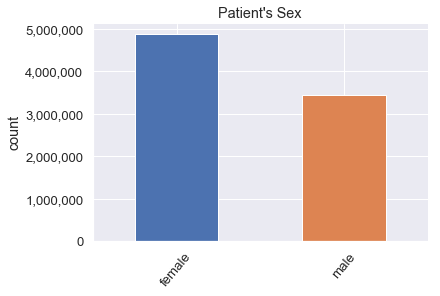

In [63]:
#Plot Patient's Sex - All Years/Total

count_plot(df = pat_charc_data_clean_1, col_name = 'sexo_names', title = "Patient's Sex")

> ### Part 2. Patient's Race

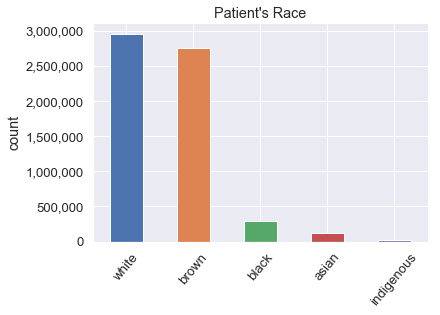

In [64]:
#Plot Patient's Race - All Years/Total

count_plot(df = pat_charc_data_clean_1, col_name = 'race_names', title = "Patient's Race")

> ### Part 3. Ethnicity

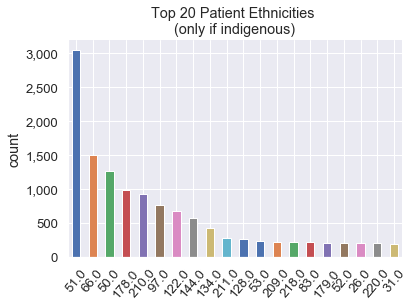

In [65]:
# Plot Top 20 ethnicities - All Years/Total

count_plot_slice(df = pat_charc_data_clean_1,
                 col_name = 'ETNIA_CAT', head = 20,
                 title = 'Top 20 Patient Ethnicities \n(only if indigenous)', 
                 xlabel = '', ylabel = 'count')

> ### Part 4. Patient's Municipality

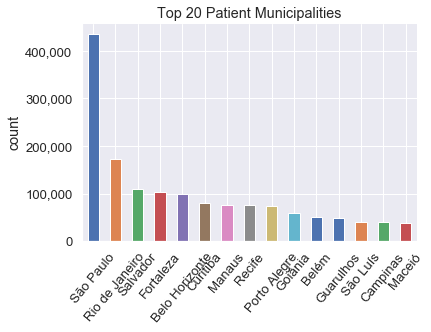

In [70]:
# Plot Top 20 municipalities - All Years/Total

count_plot_slice(df = pat_charc_data_clean_1,
                 col_name = 'MUNIC_RES_NAME', head = 15,
                 title = 'Top 20 Patient Municipalities', 
                 xlabel = '', ylabel = 'count')

> ### Part 5. Patient's Mortality Indicator

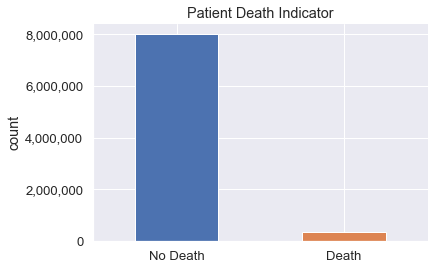

In [79]:
#Plot Patient's Mortality - All Years/Total

ax = pat_charc_data_clean_1['MORTE'].value_counts().plot(kind="bar")
    
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
sns.despine()
    
plt.xticks(np.arange(2), ('No Death','Death'), rotation = 0)
    
plt.title("Patient Death Indicator")
    
plt.xlabel('')
    
plt.ylabel('count')
    
plt.show()

> ### Part 6. Patient's Age

Text(0.5,0,'Age')

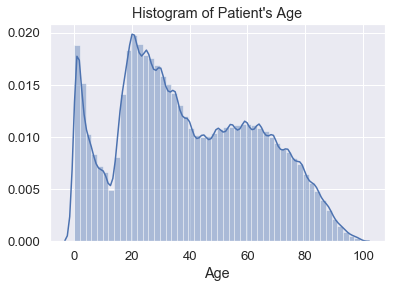

In [83]:
# Plot age variable - - All Years/Total

sns.distplot(pat_charc_data_clean_1['IDADE'])

plt.title("Histogram of Patient's Age")

plt.xlabel('Age')

Normalize Age

In [89]:
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(pat_charc_data_clean_1[['IDADE']])
df_age_norm = pd.DataFrame(age_scaled)

Text(0.5,0,'Age')

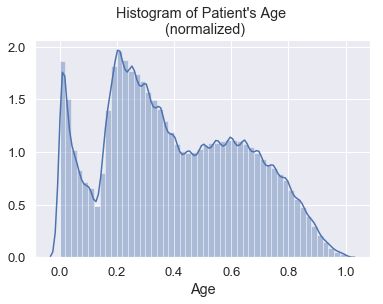

In [91]:
sns.distplot(df_age_norm)

plt.title("Histogram of Patient's Age \n (normalized)")

plt.xlabel('Age')

CDF, ECF + replicates

> Plot Heat Map of Demographics Features

In [92]:
patient_chara_corr = pat_charc_data_clean_1.corr()

Text(0.5,1,'Heat Map of Patient Characteristics')

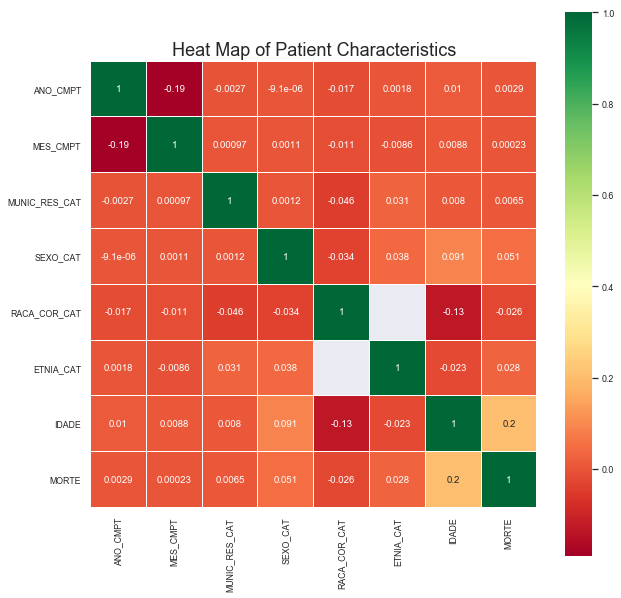

In [93]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=.8)

sns.heatmap(patient_chara_corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Patient Characteristics', fontsize = 18)

### Diagnostic Data Bloc  

In [94]:
diag_data = AIH_sample[diag]

diag_data.head(10)

,DIAG_PRINC,DIAG_SECUN
index_name,,
0,O623,0
1,P599,0
2,O800,0
3,S524,0
4,L989,0
5,I10,0
6,S367,0
7,A90,0
8,K299,0


In [95]:
diag_data.describe()

,DIAG_SECUN
count,8329642.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Secondary diagnosis is empty.

In [96]:
count_diag = pd.DataFrame(diag_data.DIAG_PRINC.value_counts()).reset_index()

In [103]:
count_diag['log'] = np.log(count_diag['DIAG_PRINC'])

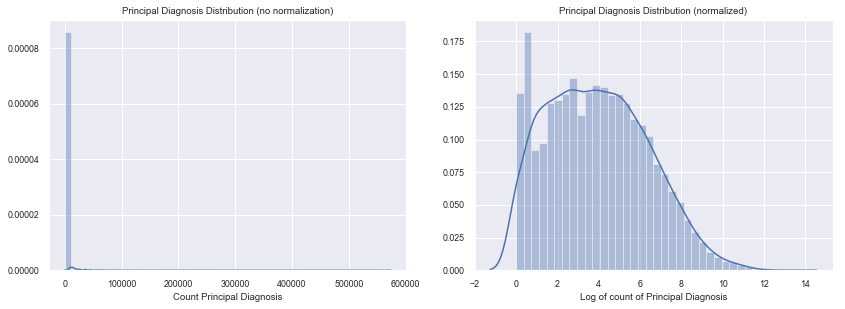

In [106]:
# Histogram of diagnosis counts (not normalized)

plt.subplot(221)

sns.distplot(count_diag.DIAG_PRINC)

plt.title("Principal Diagnosis Distribution (no normalization)")

plt.xlabel('Count Principal Diagnosis')

# Histogram of diagnosis counts normalized using log

plt.subplot(222)

sns.distplot(count_diag.log)

plt.title("Principal Diagnosis Distribution (normalized)")

plt.xlabel('Log of count of Principal Diagnosis')

plt.tight_layout(rect=(2, 2, 4, 4))